# Basic Regularization Methods

This notebook demonstrates fundamental regularization techniques in TensorFlow to prevent overfitting and improve model generalization. We'll implement and compare:

1. L1 and L2 regularization
2. Dropout regularization
3. Early stopping
4. Monte Carlo dropout

We'll use the Fashion MNIST dataset as our example and perform A/B testing to compare the effectiveness of each method.

## Data Preparation

We start by importing the necessary TensorFlow libraries and loading the Fashion MNIST dataset. The dataset consists of 28x28 grayscale images of clothing items in 10 categories.

We normalize the pixel values to the range [0, 1] by dividing by 255. Then, we split off a portion of the training data to create a validation set, which we'll use to evaluate our models during training and for early stopping.

In [12]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

# Split the training data to create a validation set
val_split = 10000
x_val, y_val = x_train[:val_split], y_train[:val_split]
x_train, y_train = x_train[val_split:], y_train[val_split:]

print(f"Training set shape: {x_train.shape}")
print(f"Validation set shape: {x_val.shape}")
print(f"Test set shape: {x_test.shape}")

Training set shape: (50000, 28, 28)
Validation set shape: (10000, 28, 28)
Test set shape: (10000, 28, 28)


## L1 and L2 Regularization Models

This code defines three model architectures:

1. **Baseline Model**: A simple neural network without any regularization.
2. **L1 Regularized Model**: Applies L1 regularization (Lasso) to the kernel weights of the Dense layers. L1 regularization adds a penalty equal to the absolute value of the weights, which tends to produce sparse models by driving some weights to exactly zero.
3. **L2 Regularized Model**: Applies L2 regularization (Ridge) to the kernel weights. L2 regularization adds a penalty equal to the square of the weights, which discourages large weights but doesn't typically drive weights to exactly zero.

The regularization strength can be adjusted through the `l1_strength` and `l2_strength` parameters. Higher values mean stronger regularization.

In [13]:
# Create a baseline model without regularization
def create_baseline_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Create a model with L1 regularization
def create_l1_model(l1_strength=0.001):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_regularizer=l1(l1_strength)),
        Dense(64, activation='relu', kernel_regularizer=l1(l1_strength)),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Create a model with L2 regularization
def create_l2_model(l2_strength=0.001):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_regularizer=l2(l2_strength)),
        Dense(64, activation='relu', kernel_regularizer=l2(l2_strength)),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

## Dropout and Training Models

Here we implement:

1. **Dropout Regularization**: A technique where randomly selected neurons are ignored during training, forcing the network to be more robust. The `dropout_rate` parameter controls what fraction of neurons are dropped in each training step.

2. **Early Stopping Callback**: We define an early stopping mechanism that monitors validation loss and stops training when it stops improving, preventing overfitting by avoiding unnecessary epochs.

Then we train the baseline and L1 regularized models for 30 epochs. The training history is stored for later comparison and visualization. Each model is evaluated on the validation data after every epoch to track performance over time.

In [14]:
# Create a model with Dropout regularization
def create_dropout_model(dropout_rate=0.3):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Define callback for early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the baseline model
baseline_model = create_baseline_model()
baseline_history = baseline_model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_val, y_val),
    verbose=1
)

# Train the L1 regularized model
l1_model = create_l1_model()
l1_history = l1_model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7598 - loss: 0.7127 - val_accuracy: 0.8328 - val_loss: 0.4476
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8527 - loss: 0.4079 - val_accuracy: 0.8587 - val_loss: 0.3913
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8716 - loss: 0.3540 - val_accuracy: 0.8749 - val_loss: 0.3499
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8819 - loss: 0.3221 - val_accuracy: 0.8815 - val_loss: 0.3299
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8846 - loss: 0.3056 - val_accuracy: 0.8855 - val_loss: 0.3263
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8938 - loss: 0.2858 - val_accuracy: 0.8606 - val_loss: 0.3706
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8988 - loss: 0.2734 - val_accuracy: 0.8875 - val_loss: 0.3113
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9012 - loss: 0.2601 - val_accuracy: 0.

## Training Models with Different Regularization Techniques

In this code block, we continue training additional regularized models:

1. **L2 Regularization Model**: Similar to L1 but with a different penalty mechanism that discourages large weights without necessarily creating sparsity.

2. **Dropout Model**: Implements neuron dropout during training, which helps prevent co-adaptation of neurons.

3. **Early Stopping Model**: Uses a baseline architecture but with the early stopping callback. We set a large number of epochs (100), but the early stopping mechanism will halt training when validation performance stops improving, based on the patience setting (5 epochs).

Each model's training history is saved for later performance comparison. This approach allows us to directly compare how different regularization techniques affect model performance on the same dataset.

In [15]:
# Train the L2 regularized model
l2_model = create_l2_model()
l2_history = l2_model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_val, y_val),
    verbose=1
)

# Train the Dropout model
dropout_model = create_dropout_model()
dropout_history = dropout_model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_val, y_val),
    verbose=1
)

# Train a model with Early Stopping
early_stop_model = create_baseline_model()
early_stop_history = early_stop_model.fit(
    x_train, y_train,
    epochs=50,  # Setting a high number, early stopping will determine when to stop
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7511 - loss: 0.9539 - val_accuracy: 0.8435 - val_loss: 0.5840
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8484 - loss: 0.5698 - val_accuracy: 0.8505 - val_loss: 0.5495
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8606 - loss: 0.5084 - val_accuracy: 0.8693 - val_loss: 0.4748
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8621 - loss: 0.4866 - val_accuracy: 0.8648 - val_loss: 0.4703
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8668 - loss: 0.4667 - val_accuracy: 0.8635 - val_loss: 0.4704
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8657 - loss: 0.4593 - val_accuracy: 0.8583 - val_loss: 0.4851
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8722 - loss: 0.4398 - val_accuracy: 0.8688 - val_loss: 0.4461
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8743 - loss: 0.4292 - val_accuracy: 0.

## Training Models with Different Regularization Techniques (Optimized)

This code block trains our regularized models with optimized parameters for faster execution:

1. **Reduced Epochs**: We've reduced training to just 5 epochs for faster completion while still demonstrating the concepts.

2. **Larger Batch Size**: Using a batch size of 128 instead of 64 speeds up training by processing more examples in parallel.

3. **Early Stopping**: For the early stopping model, we set a maximum of 10 epochs instead of 100, but the early stopping callback will likely terminate training even earlier.

These optimizations maintain the demonstration of each regularization technique while significantly reducing execution time, making the notebook more practical for learning purposes.

In [ ]:
# Let's keep training efficient with fewer epochs and simpler models
EPOCHS = 5  # Reduced number of epochs for faster training
BATCH_SIZE = 128  # Larger batch size for faster training

# Train the L2 regularized model
l2_model = create_l2_model()
l2_history = l2_model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    verbose=1
)

# Train the Dropout model
dropout_model = create_dropout_model()
dropout_history = dropout_model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    verbose=1
)

# Train a model with Early Stopping
early_stop_model = create_baseline_model()
early_stop_history = early_stop_model.fit(
    x_train, y_train,
    epochs=10,  # Reduced maximum epochs with early stopping
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

## Monte Carlo Dropout for Uncertainty Estimation

Monte Carlo (MC) Dropout is a technique that enables uncertainty estimation in neural networks by keeping dropout active during inference.

Key points:
1. **Model Creation**: We create a model where dropout layers remain active during prediction by setting `trainable=True`.

2. **MC Prediction Function**: The `mc_dropout_predict` function runs multiple forward passes (10 in this case) with dropout enabled, resulting in different predictions for the same input. This models the epistemic uncertainty of the network.

3. **Uncertainty Metrics**: For each test sample, we calculate:
   - Mean prediction: The average output across multiple runs
   - Standard deviation: Measures the model's uncertainty about its prediction

4. **Testing**: We demonstrate the technique on 5 test examples, showing both the predicted class and the associated uncertainty value. Higher uncertainty values indicate less confidence in the model's prediction.

This technique is valuable in scenarios where understanding model confidence is crucial, such as in medical diagnostics or autonomous driving.

In [18]:
# Monte Carlo Dropout Implementation
def create_mc_dropout_model(dropout_rate=0.3):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(dropout_rate, trainable=True),  # Keep dropout active during inference
        Dense(64, activation='relu'),
        Dropout(dropout_rate, trainable=True),  # Keep dropout active during inference
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Train the MC Dropout model
mc_dropout_model = create_mc_dropout_model()
mc_dropout_history = mc_dropout_model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    verbose=1
)

# Function to perform Monte Carlo predictions
def mc_dropout_predict(model, x_sample, n_samples=10):
    predictions = []
    # Enable dropout during inference by setting training=True
    for _ in range(n_samples):
        pred = model(x_sample, training=True)
        predictions.append(pred)

    # Stack predictions and calculate mean and std
    predictions = tf.stack(predictions)
    mean_pred = tf.reduce_mean(predictions, axis=0)
    std_pred = tf.math.reduce_std(predictions, axis=0)

    return mean_pred, std_pred

# Test MC Dropout on a few examples
test_samples = x_test[:5]
mean_preds, std_preds = mc_dropout_predict(mc_dropout_model, test_samples)

# Display prediction uncertainty
for i in range(5):
    predicted_class = tf.argmax(mean_preds[i]).numpy()
    uncertainty = np.mean(std_preds[i].numpy())
    print(f"Example {i+1}: Predicted class = {predicted_class}, Uncertainty = {uncertainty:.4f}")

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6196 - loss: 1.0538 - val_accuracy: 0.8369 - val_loss: 0.4572
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8143 - loss: 0.5231 - val_accuracy: 0.8546 - val_loss: 0.3983
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8398 - loss: 0.4571 - val_accuracy: 0.8635 - val_loss: 0.3770
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8445 - loss: 0.4288 - val_accuracy: 0.8658 - val_loss: 0.3616
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8588 - loss: 0.3980 - val_accuracy: 0.8713 - val_loss: 0.3518
Example 1: Predicted class = 9, Uncertainty = 0.0431
Example 2: Predicted class = 2, Uncertainty = 0.0112
Example 3: Predicted class = 1, Uncertainty = 0.0001
Example 4: Predicted class = 1, Uncertainty = 0.0000
Example 5: Predicted class = 6, Uncertainty = 0.0272


## Visualizing and Comparing Model Performance

This code creates visualizations to compare the performance of our different regularization techniques:

1. **Accuracy Plot**: Shows training and validation accuracy across epochs for all models. This helps visualize how quickly each model learns and whether overfitting occurs.

2. **Loss Plot**: Displays training and validation loss for each model, helping identify when a model starts to overfit (validation loss increases while training loss continues to decrease).

3. **Model Evaluation**: We evaluate all six models on the test set to measure their generalization performance on unseen data.

By comparing these metrics, we can draw conclusions about which regularization technique performs best for this dataset:
- L1 and L2 regularization both control overfitting by penalizing large weights
- Dropout prevents co-adaptation of neurons by randomly "turning off" some during training
- Early stopping prevents overfitting by stopping training when validation performance stops improving
- Monte Carlo Dropout provides uncertainty estimates in addition to predictions

The best technique depends on your specific use case and the characteristics of your data.

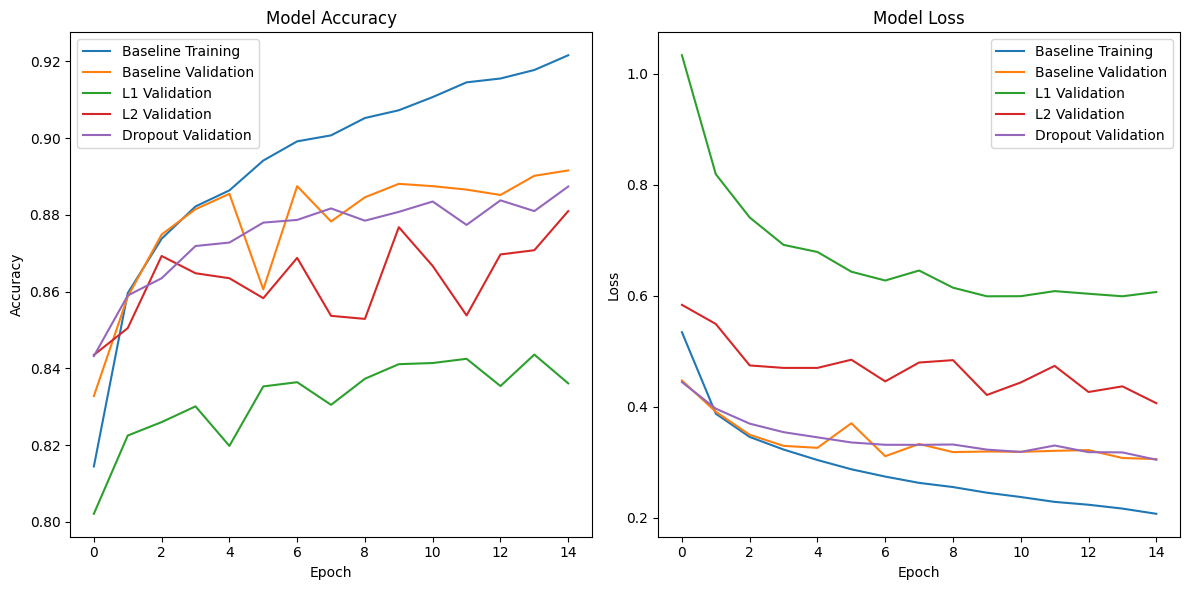

Test Accuracy:
Baseline: 0.8842
L1 Regularization: 0.8282
L2 Regularization: 0.8706
Dropout: 0.8771
Early Stopping: 0.8870
MC Dropout: 0.8631


In [19]:
# Plot the training and validation accuracy for all models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(baseline_history.history['accuracy'], label='Baseline Training')
plt.plot(baseline_history.history['val_accuracy'], label='Baseline Validation')
plt.plot(l1_history.history['val_accuracy'], label='L1 Validation')
plt.plot(l2_history.history['val_accuracy'], label='L2 Validation')
plt.plot(dropout_history.history['val_accuracy'], label='Dropout Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(baseline_history.history['loss'], label='Baseline Training')
plt.plot(baseline_history.history['val_loss'], label='Baseline Validation')
plt.plot(l1_history.history['val_loss'], label='L1 Validation')
plt.plot(l2_history.history['val_loss'], label='L2 Validation')
plt.plot(dropout_history.history['val_loss'], label='Dropout Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate all models on the test set
models = {
    'Baseline': baseline_model,
    'L1 Regularization': l1_model,
    'L2 Regularization': l2_model,
    'Dropout': dropout_model,
    'Early Stopping': early_stop_model,
    'MC Dropout': mc_dropout_model
}

# Print test accuracy for each model
print("Test Accuracy:")
for name, model in models.items():
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"{name}: {test_acc:.4f}")